# PyBer
### Set Everything Up

In [2]:
# Add the Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [7]:
# Read the city data file and store it in a pandas DattaFrame.
city_data_df = pd.read_csv(city_data_to_load)

# Read the ride data file and store it in a pandas DattaFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

### Check to see if dataframes are missing values or need cleaning

In [10]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
# Get the data types of each columns.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [14]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
sum(city_data_df["type"]=="Rural")

36

In [18]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [19]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Combine Datasets

In [23]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

# Display the DataFrame.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Making Scatter Plot of the DataFrame
For the scatter plot, we will need the following:
* The average fare for each type of city on the y-axis
* The total number of rides for each type city on the x-axis
* Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

### Get dataframes needed

In [27]:
# Create the DataFrames based on city.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [31]:
# Get the number of rides for each city type
# Urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [34]:
# Get the average fare for each city in each of the types of cities.
# Urban
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()
# Suburban
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
# Rural
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [36]:
# Get the average number of drivers for each city of each city type.
# Urban
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count
# Suburban
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# Rural
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

#### Urban City Bubble Chart

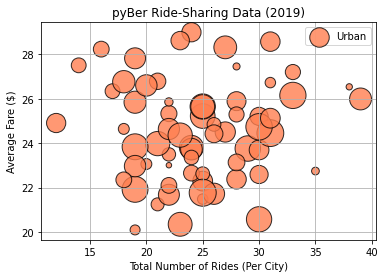

In [39]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare, s=10 * urban_driver_count,
            c="coral", edgecolor="black",
            linewidth=1,alpha=0.8, label="Urban")
plt.title("pyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add a legend.
plt.legend()

#### Suburban City Bubble Chart

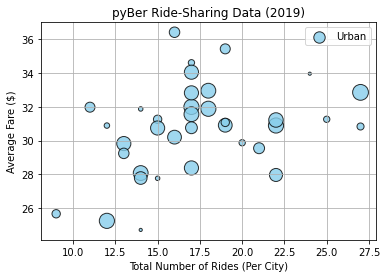

In [41]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare, s=10 * suburban_driver_count,
            c="skyblue", edgecolor="black",
            linewidth=1,alpha=0.8, label="Urban")
plt.title("pyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add a legend.
plt.legend()

#### Rural City Bubble Chart

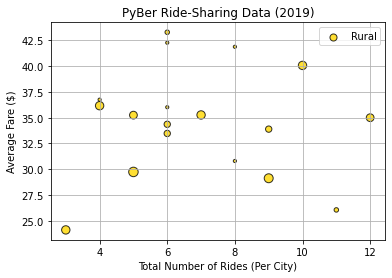

In [42]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### Combine Bubble Charts into 1

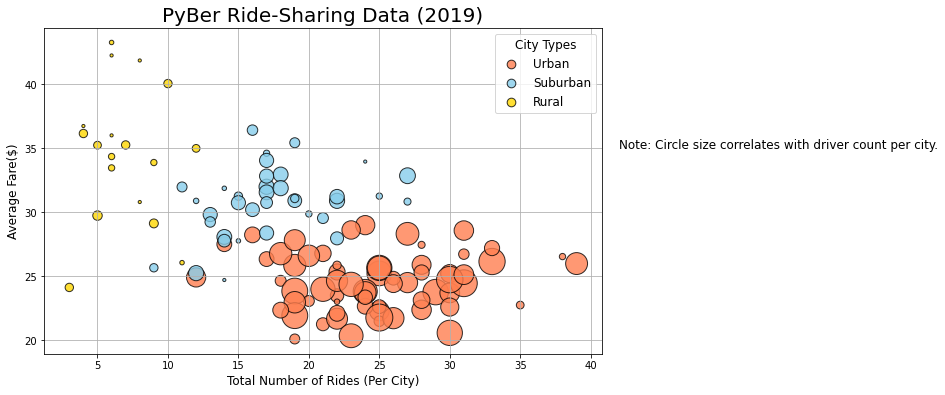

In [50]:
# Build the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties.
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()